In [1]:
# Performing a sentiment analysis on newspaper political claims dataset using Python

# USeful links: 
# https://www.youtube.com/watch?v=ng6L_wvREB4 c/o 'THE AI & DS Channel' on Youtube (this link was very helpful for guiding me through this project)
# https://stackoverflow.com/questions/43485469/apply-textblob-in-for-each-row-of-a-dataframe
# N.B. Dataset is my own (from PhD project)
# import packages

import sys
!{sys.executable} -m pip install textblob
!{sys.executable} -m pip install wordcloud
import pandas as pd
import string
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# import dataset

df = pd.read_csv(r'C:\Users\kerme\phd_dataset_final.csv')
df.head()

,statement ID,time,document ID,document title,author,source,source_country,newsp_type,section,type,...,EUval,period,parfam,sentiment_diff,sentiment_ratio,bool_act2obj,bool_act2adr,bool_act,bool_adr,bool_obj
0,1,3/18/2019 1:00:00,1495,1495_Gazeta Wyborcza_2019-03_Poland_pre-Covid,IAR/AZ,Gazeta Wyborcza,POLAND,quality,NaN,newspaper,...,0,pre-Covid,1. radical TAN,3,0.636364,-1,1,-1,1,-1
1,2,3/18/2019 1:00:00,1495,1495_Gazeta Wyborcza_2019-03_Poland_pre-Covid,IAR/AZ,Gazeta Wyborcza,POLAND,quality,NaN,newspaper,...,0,pre-Covid,3. liberal,1,1.000000,-1,0,1,0,1
2,3,3/18/2019 1:00:00,1496,1496_Gazeta Wyborcza_2019-03_Poland_pre-Covid,IAR/AZ,Gazeta Wyborcza,POLAND,quality,NaN,newspaper,...,0,pre-Covid,NaN,2,0.750000,0,0,1,0,0
3,4,3/18/2019 1:00:00,1496,1496_Gazeta Wyborcza_2019-03_Poland_pre-Covid,IAR/AZ,Gazeta Wyborcza,POLAND,quality,NaN,newspaper,...,0,pre-Covid,4. Christian-democratic,-2,0.444444,1,0,-1,0,1
4,5,3/18/2019 1:00:00,1496,1496_Gazeta Wyborcza_2019-03_Poland_pre-Covid,IAR/AZ,Gazeta Wyborcza,POLAND,quality,NaN,newspaper,...,0,pre-Covid,1. radical TAN,3,0.800000,0,1,-1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768 entries, 0 to 3767
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   statement ID     3768 non-null   int64  
 1   time             3768 non-null   object 
 2   document ID      3768 non-null   int64  
 3   document title   3768 non-null   object 
 4   author           3260 non-null   object 
 5   source           3768 non-null   object 
 6   source_country   3768 non-null   object 
 7   newsp_type       3768 non-null   object 
 8   section          0 non-null      float64
 9   type             3768 non-null   object 
 10  text             3768 non-null   object 
 11  actname          3768 non-null   object 
 12  actorg           3768 non-null   object 
 13  actorg_misc      1042 non-null   object 
 14  act_type         3768 non-null   object 
 15  act_nat          3649 non-null   object 
 16  act_region       3768 non-null   object 
 17  act_scope     

In [4]:
# View column names

df.columns

Index(['statement ID', 'time', 'document ID', 'document title', 'author',
       'source', 'source_country', 'newsp_type', 'section', 'type', 'text',
       'actname', 'actorg', 'actorg_misc', 'act_type', 'act_nat', 'act_region',
       'act_scope', 'act_scope_RECON', 'adrname', 'adrorg', 'adrorg_misc',
       'adr_type', 'adr_nat', 'adr_region', 'adr_scope', 'adr_scope_RECON',
       'adreval', 'act2adr', 'objs', 'objtype', 'objnat', 'obj_region',
       'obj_scope', 'obj_scope_RECON', 'act2obj', 'issue', 'issfield', 'frame',
       'frame_type', 'EUval', 'period', 'parfam', 'sentiment_diff',
       'sentiment_ratio', 'bool_act2obj', 'bool_act2adr', 'bool_act',
       'bool_adr', 'bool_obj'],
      dtype='object')

In [5]:
# drop all columns save for 'text' column

In [6]:
text_df = df.drop(['statement ID', 'time', 'document ID', 'document title', 'author',
       'source', 'source_country', 'newsp_type', 'section', 'type',
       'actname', 'actorg', 'actorg_misc', 'act_type', 'act_nat', 'act_region',
       'act_scope', 'act_scope_RECON', 'adrname', 'adrorg', 'adrorg_misc',
       'adr_type', 'adr_nat', 'adr_region', 'adr_scope', 'adr_scope_RECON',
       'adreval', 'act2adr', 'objs', 'objtype', 'objnat', 'obj_region',
       'obj_scope', 'obj_scope_RECON', 'act2obj', 'issue', 'issfield', 'frame',
       'frame_type', 'EUval', 'period', 'parfam', 'sentiment_diff',
       'sentiment_ratio', 'bool_act2obj', 'bool_act2adr', 'bool_act',
       'bool_adr', 'bool_obj'], axis=1)

In [7]:
text_df.head()

,text
0,Mateusz Morawiecki also mentioned that the Eur...
1,France among others is also in favour of a lev...
2,New rules of the European Parliament of the Eu...
3,- We have ownership unbundling within the Unio...
4,he admitted that agreement in the EU was only ...


In [8]:
# Let's analyse some of the data in more detail

print(text_df.text.iloc[0], "\n")
print(text_df.text.iloc[1], "\n")
print(text_df.text.iloc[2], "\n")
print(text_df.text.iloc[3], "\n")
print(text_df.text.iloc[4], "\n")

Mateusz Morawiecki also mentioned that the European Commission and the OECD have just pointed to Ireland as well as Cyprus Malta and Belgium as countries that he said help multinational companies avoid paying taxes. We do not like it fundamentally because it means that we are being deprived of these taxes in favour of a very rich Ireland. Of course we love the Irish and their beautiful island but we want fair taxes. - Mateusz Morawiecki said. 

France among others is also in favour of a levy. At the beginning of March the government in Paris announced a plan to impose a 3% tax on revenues generated in France by internet giants. 

New rules of the European Parliament of the European Parliament may hinder the construction of Nord Stream 2. Today's decision by MEPs brings the entry into force of the revised Gas Directive a step closer. MEPs in the energy and industry committee approved the negotiators' findings on the issue. The MEPs' energy and industry committees approved the negotiator

In [9]:
# Preprocessing of text data
# Create a function to clean the text data

order = r'[0 - 9]'

def txt_clean(text):
    text = text.lower() #to lower
    text = re.sub(order, ' ', text) #remove numbers
    text = text.translate(str.maketrans('','', string.punctuation)) # Remove puntuation
    text_tokens = word_tokenize(text) # remove stopwords
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)
    
    

In [10]:
text_df['text'] = text_df['text'].apply(txt_clean)

In [11]:
print(text_df.text.iloc[0], "\n")

mateusz morawiecki also mentioned european commission oecd pointed ireland well cyprus malta belgium countries said help multinational companies avoid paying taxes like fundamentally means deprived taxes favour rich ireland course love irish beautiful island want fair taxes mateusz morawiecki said 



In [12]:
# word stemming

stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [13]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [14]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768 entries, 0 to 3767
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3768 non-null   object
dtypes: object(1)
memory usage: 29.6+ KB


In [15]:
# Add polarity function

def polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

In [16]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [17]:
text_df.head()

,text,polarity
0,mateusz morawiecki also mentioned european com...,0.404167
1,france among others also favour levy beginning...,0.000000
2,new rules european parliament european parliam...,0.045455
3,ownership unbundling within union transparent ...,0.063648
4,admitted agreement eu possible amended directi...,-0.083333


In [18]:
# Create categorical variables from polarity values

def sentiment(label):
    if label < 0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label > 0:
        return "Positive"
    

In [19]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [20]:
text_df.head()

,text,polarity,sentiment
0,mateusz morawiecki also mentioned european com...,0.404167,Positive
1,france among others also favour levy beginning...,0.000000,Neutral
2,new rules european parliament european parliam...,0.045455,Positive
3,ownership unbundling within union transparent ...,0.063648,Positive
4,admitted agreement eu possible amended directi...,-0.083333,Negative


<AxesSubplot:xlabel='sentiment', ylabel='count'>

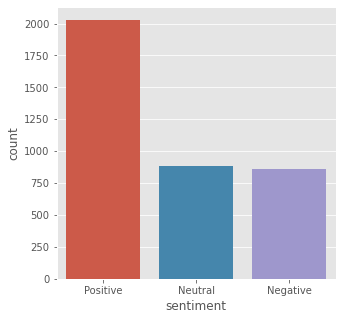

In [21]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data =text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

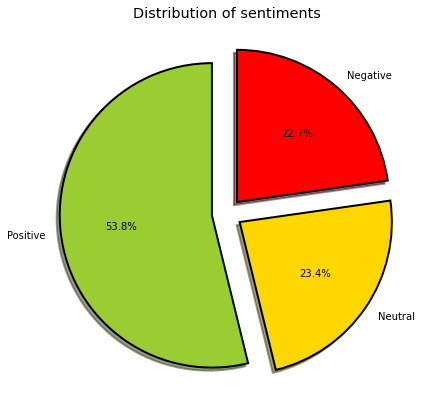

In [22]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')


In [23]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()


,text,polarity,sentiment
3609,wonderful news wrote council president giusepp...,1.0,Positive
360,city movement fights advertising chaos warsaw ...,1.0,Positive
1863,forgiveness indulgence greatest gift given sit...,1.0,Positive
93,interior minister michael farrugia assures us ...,1.0,Positive
408,rutte added somewhat lacklustre repertoire des...,0.9,Positive


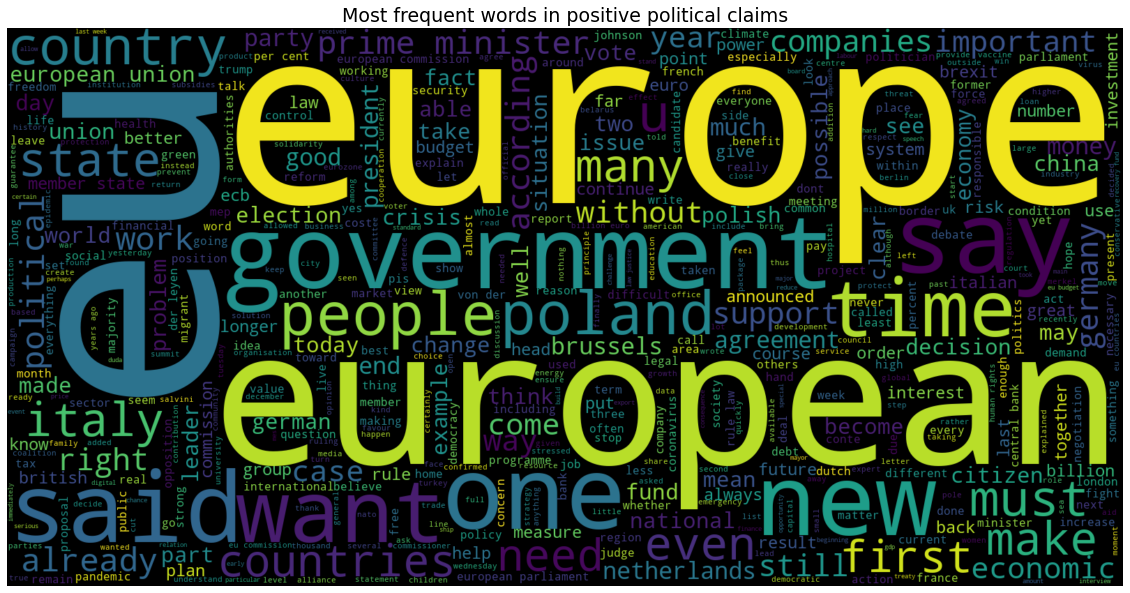

In [24]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive political claims', fontsize=19)
plt.show()


In [25]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
1308,mention external threats china macron talks br...,-0.000084,Negative
3423,conflict warsaw budapest officials brussels fa...,-0.001119,Negative
2586,de unie two arguments signing letter says chai...,-0.001333,Negative
2338,almost eur 4 billion extra spending may sound ...,-0.001563,Negative
2457,court justice remained firm upheld ruling ther...,-0.002381,Negative


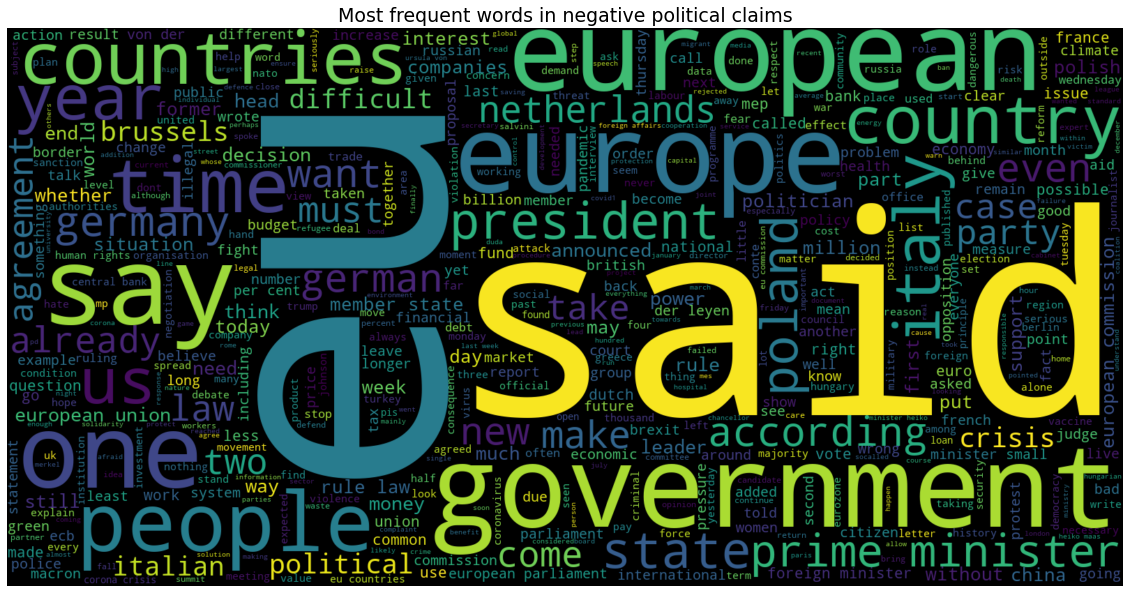

In [26]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative political claims', fontsize=19)
plt.show()


In [27]:
# Now let's text how accurate the sentiment analysis model is...
# TBC 29-11-22

vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [30]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))


Number of features: 178397

First 20 features:
 ['11', '11 12', '11 anticipated', '11 antónio', '11 billion', '11 called', '11 cases', '11 centreright', '11 coal', '11 days', '11 december', '11 european', '11 euros', '11 food', '11 gdp', '11 government', '11 heads', '11 immigrants', '11 italy', '11 meps']


In [31]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (3014, 178397)
Size of y_train: (3014,)
Size of x_test: (754, 178397)
Size of y_test: (754,)


In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))


Test accuracy: 72.94%


In [36]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 60  54  60]
 [  9 144  16]
 [ 18  47 346]]


              precision    recall  f1-score   support

    Negative       0.69      0.34      0.46       174
     Neutral       0.59      0.85      0.70       169
    Positive       0.82      0.84      0.83       411

    accuracy                           0.73       754
   macro avg       0.70      0.68      0.66       754
weighted avg       0.74      0.73      0.71       754



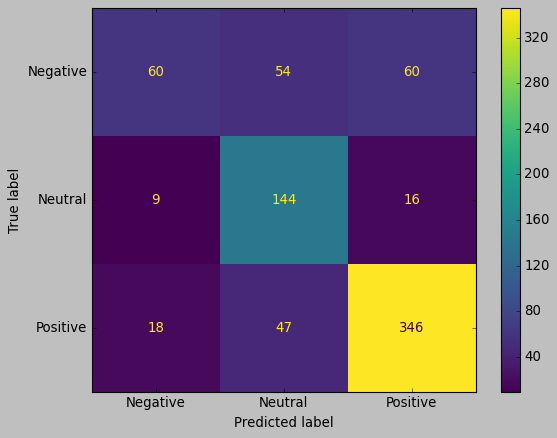

In [37]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [40]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 1}


In [41]:
y_pred = grid.predict(x_test)

In [42]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))


Test accuracy: 72.94%


In [43]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 60  54  60]
 [  9 144  16]
 [ 18  47 346]]


              precision    recall  f1-score   support

    Negative       0.69      0.34      0.46       174
     Neutral       0.59      0.85      0.70       169
    Positive       0.82      0.84      0.83       411

    accuracy                           0.73       754
   macro avg       0.70      0.68      0.66       754
weighted avg       0.74      0.73      0.71       754



In [44]:
from sklearn.svm import LinearSVC

In [45]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [46]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 72.41%


In [47]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))


[[ 69  52  53]
 [  9 147  13]
 [ 21  60 330]]


              precision    recall  f1-score   support

    Negative       0.70      0.40      0.51       174
     Neutral       0.57      0.87      0.69       169
    Positive       0.83      0.80      0.82       411

    accuracy                           0.72       754
   macro avg       0.70      0.69      0.67       754
weighted avg       0.74      0.72      0.72       754



In [48]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)


GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [49]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 0.1}


In [50]:
y_pred = grid.predict(x_test)

In [51]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 73.21%


In [52]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 68  55  51]
 [  9 147  13]
 [ 18  56 337]]


              precision    recall  f1-score   support

    Negative       0.72      0.39      0.51       174
     Neutral       0.57      0.87      0.69       169
    Positive       0.84      0.82      0.83       411

    accuracy                           0.73       754
   macro avg       0.71      0.69      0.67       754
weighted avg       0.75      0.73      0.72       754

